# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 4 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 4]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_4,sin_time,cos_time
5302,10.205776,17.686925,18.801950,17.127009,2964.675409,83500000000,15.179702,15.755447,13.742694,0.000000,...,9446.603833,9480.921743,8559.072445,88.873997,0.000000,1.024578,0.000000,1,2.588190e-01,-0.965926
5316,9.176182,17.673658,19.108834,16.738390,2960.742928,83500000000,13.900703,15.049485,13.230616,0.000000,...,257.811683,262.021047,251.982970,91.606445,0.345162,1.238707,0.338332,1,2.588190e-01,-0.965926
5322,10.233360,17.703341,18.502817,16.730091,2955.687061,83500000000,30.443877,31.541453,28.798566,2.434434,...,34.834294,36.078705,34.615641,107.702237,0.083843,1.432264,0.079327,1,1.224647e-16,-1.000000
5328,7.814947,17.581570,19.158579,16.269258,2957.927370,83500000000,0.000000,0.000000,0.000000,0.000000,...,29.923493,29.961843,29.529582,70.568955,0.785137,2.112298,0.781756,1,1.224647e-16,-1.000000
5375,9.807727,17.099042,17.730567,15.820980,2959.455092,73500000000,10.021564,10.500068,9.178899,0.000000,...,3854.820667,4019.194085,3795.403278,54.000214,0.000000,0.221063,0.000000,1,-2.588190e-01,-0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82673,13.919395,4.745776,4.856423,4.443515,4825.634696,73500000000,7.855904,8.221264,7.675225,0.047736,...,39123.247140,40288.443589,38089.521308,94.485489,0.392430,2.719377,0.378687,1,-2.588190e-01,0.965926
82674,13.287766,4.654969,4.745123,4.204716,4823.781642,83500000000,7.924229,8.207374,7.342110,0.005089,...,41297.470520,42980.555520,40876.418369,121.240888,1.163113,4.060007,1.120483,1,-2.588190e-01,0.965926
82742,12.415965,4.759933,4.796343,4.430455,4824.610165,83500000000,0.000000,0.000000,0.000000,0.000000,...,22713.239520,23868.695304,20656.837849,91.478465,0.993168,5.749203,0.982830,1,2.588190e-01,0.965926
82946,11.152394,3.682117,3.843633,3.603199,4822.483619,83500000000,12.199592,13.374298,11.323808,0.000000,...,53711.385510,58238.666302,52655.172285,97.813379,1.298064,3.642118,1.258924,1,5.000000e-01,0.866025


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F991A03850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F992D52950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F992D533D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F98D4615D0>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.8777966167742844


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
9             Particulate  0.516142  0.902720                   16
10               cos_time  0.517136  0.902344                   15
13          VisibilityMin  0.518166  0.901955                   12
2           WindDirection  0.518623  0.901782                   23
14              Frequency  0.518844  0.901699                   11
7   TemperatureDifference  0.518941  0.901662                   18
5                sin_time  0.518972  0.901650                   20
11         ParticulateMin  0.519152  0.901582                   14
8           VisibilityMax  0.519217  0.901557                   17
12    AbsoluteHumidityMax  0.519743  0.901357                   13
1            WindSpeedMin  0.519861  0.901313                   24
6            WindSpeedMax  0.521003  0.900879                   19
3                Distance  0.521176  0.900813                   22
4               WindSpeed  0.521464  0.900703                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
9,Particulate,0.516142,0.902720,16
10,cos_time,0.517136,0.902344,15
13,VisibilityMin,0.518166,0.901955,12
2,WindDirection,0.518623,0.901782,23
14,Frequency,0.518844,0.901699,11
7,TemperatureDifference,0.518941,0.901662,18
5,sin_time,0.518972,0.901650,20
11,ParticulateMin,0.519152,0.901582,14
8,VisibilityMax,0.519217,0.901557,17
12,AbsoluteHumidityMax,0.519743,0.901357,13


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_28060\3163275868.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


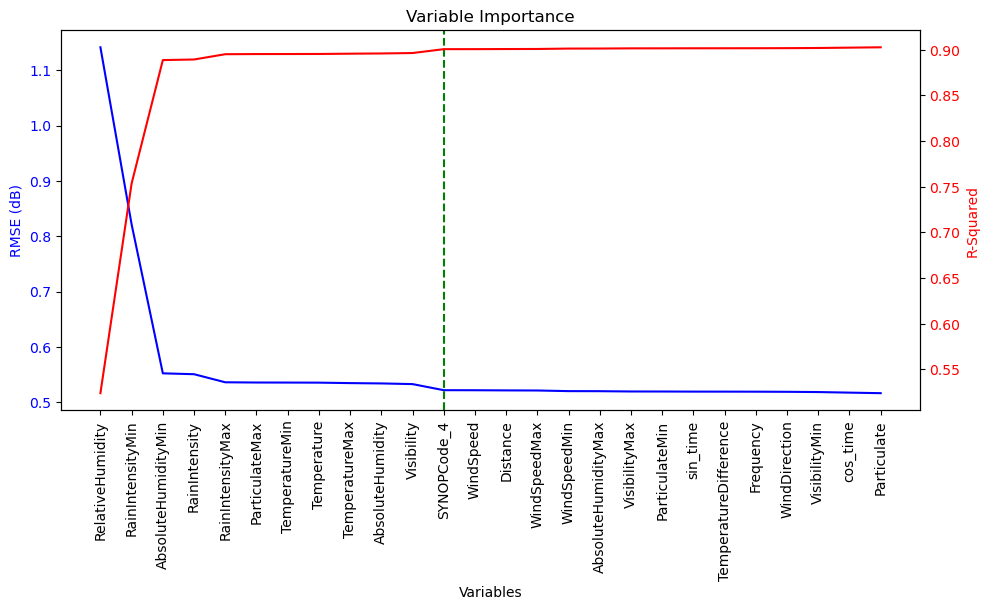

In [10]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 11
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [44]:
selected_features_RFL= [
    'SYNOPCode_4',
    'Visibility',
    'AbsoluteHumidity',
    'TemperatureMax',
    'Temperature',
    'TemperatureMin',
    'ParticulateMax',
    'RainIntensityMax',
    'RainIntensity',
    'AbsoluteHumidityMin',
    'RainIntensityMin',
    'RelativeHumidity'
]

In [45]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.8777966167742844


In [46]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=14,
    min_samples_leaf=9,
    min_samples_split=2,
    n_estimators=158,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.5091811905027528
Test R^2: 0.9089066273097504


In [ ]:
0.9075538302045998

In [29]:
selected_features_RFL1= [
    'SYNOPCode_4',
    'Visibility',
 #   'AbsoluteHumidity',
#    'TemperatureMax',
#    'Temperature',
    'TemperatureMin',
    'ParticulateMax',
#    'RainIntensityMax',
#    'RainIntensity',
    'AbsoluteHumidityMin',
    'RainIntensityMin',
    'RelativeHumidity'
]

In [30]:
# Select only the chosen features for training and testing
X_train_selected_RFL1 = X_train_RFL[selected_features_RFL1]
X_test_selected_RFL1 = X_test_RFL[selected_features_RFL1]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL1= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL1.fit(X_train_selected_RFL1, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL1 = final_model_RFL1.predict(X_test_selected_RFL1)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL1= mean_squared_error(y_test_RFL, predictions_RFL1, squared=False)
test_r2_RFL1 = r2_score(y_test_RFL, predictions_RFL1)

print(f"Test RMSE: {test_rmse_RFL1}")
print(f"Test R^2: {test_r2_RFL1}")


Test RMSE: 0.48763262407425095
Test R^2: 0.916453630067881


# FSO

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 4 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 4]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_4,sin_time,cos_time
5302,7.516704,17.686925,18.801950,17.127009,2964.675409,83500000000,15.179702,15.755447,13.742694,0.000000,...,9446.603833,9480.921743,8559.072445,88.873997,0.000000,1.024578,0.000000,1,2.588190e-01,-0.965926
5316,7.274076,17.673658,19.108834,16.738390,2960.742928,83500000000,13.900703,15.049485,13.230616,0.000000,...,257.811683,262.021047,251.982970,91.606445,0.345162,1.238707,0.338332,1,2.588190e-01,-0.965926
5322,6.982446,17.703341,18.502817,16.730091,2955.687061,83500000000,30.443877,31.541453,28.798566,2.434434,...,34.834294,36.078705,34.615641,107.702237,0.083843,1.432264,0.079327,1,1.224647e-16,-1.000000
5328,6.988898,17.581570,19.158579,16.269258,2957.927370,83500000000,0.000000,0.000000,0.000000,0.000000,...,29.923493,29.961843,29.529582,70.568955,0.785137,2.112298,0.781756,1,1.224647e-16,-1.000000
5375,7.345591,17.099042,17.730567,15.820980,2959.455092,73500000000,10.021564,10.500068,9.178899,0.000000,...,3854.820667,4019.194085,3795.403278,54.000214,0.000000,0.221063,0.000000,1,-2.588190e-01,-0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82673,11.425858,4.745776,4.856423,4.443515,4825.634696,73500000000,7.855904,8.221264,7.675225,0.047736,...,39123.247140,40288.443589,38089.521308,94.485489,0.392430,2.719377,0.378687,1,-2.588190e-01,0.965926
82674,11.404671,4.654969,4.745123,4.204716,4823.781642,83500000000,7.924229,8.207374,7.342110,0.005089,...,41297.470520,42980.555520,40876.418369,121.240888,1.163113,4.060007,1.120483,1,-2.588190e-01,0.965926
82742,9.504109,4.759933,4.796343,4.430455,4824.610165,83500000000,0.000000,0.000000,0.000000,0.000000,...,22713.239520,23868.695304,20656.837849,91.478465,0.993168,5.749203,0.982830,1,2.588190e-01,0.965926
82946,9.466038,3.682117,3.843633,3.603199,4822.483619,83500000000,12.199592,13.374298,11.323808,0.000000,...,53711.385510,58238.666302,52655.172285,97.813379,1.298064,3.642118,1.258924,1,5.000000e-01,0.866025


In [15]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [16]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F995FB3A10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F9967D9690>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F992D8B410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F9967EBCD0>},
                   random_state=42, verbose=1)

In [17]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9630319847123671


In [18]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
12              WindSpeed  0.719934  0.966595                   13
11          VisibilityMax  0.720373  0.966554                   14
8            WindSpeedMin  0.721275  0.966471                   17
9           VisibilityMin  0.723979  0.966219                   16
10       AbsoluteHumidity  0.725279  0.966097                   15
7     AbsoluteHumidityMin  0.727845  0.965857                   18
6           WindDirection  0.728131  0.965830                   19
5     AbsoluteHumidityMax  0.731323  0.965530                   20
13  TemperatureDifference  0.732517  0.965417                   12
2        RainIntensityMin  0.733071  0.965365                   23
0             SYNOPCode_4  0.735289  0.965155                   25
3           RainIntensity  0.735967  0.965091                   22
4        RainIntensityMax  0.736973  0.964995                   21
1               Frequency  0.737563  0.964939                 

In [19]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
12,WindSpeed,0.719934,0.966595,13
11,VisibilityMax,0.720373,0.966554,14
8,WindSpeedMin,0.721275,0.966471,17
9,VisibilityMin,0.723979,0.966219,16
10,AbsoluteHumidity,0.725279,0.966097,15
7,AbsoluteHumidityMin,0.727845,0.965857,18
6,WindDirection,0.728131,0.965830,19
5,AbsoluteHumidityMax,0.731323,0.965530,20
13,TemperatureDifference,0.732517,0.965417,12
2,RainIntensityMin,0.733071,0.965365,23


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_28060\2735014606.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


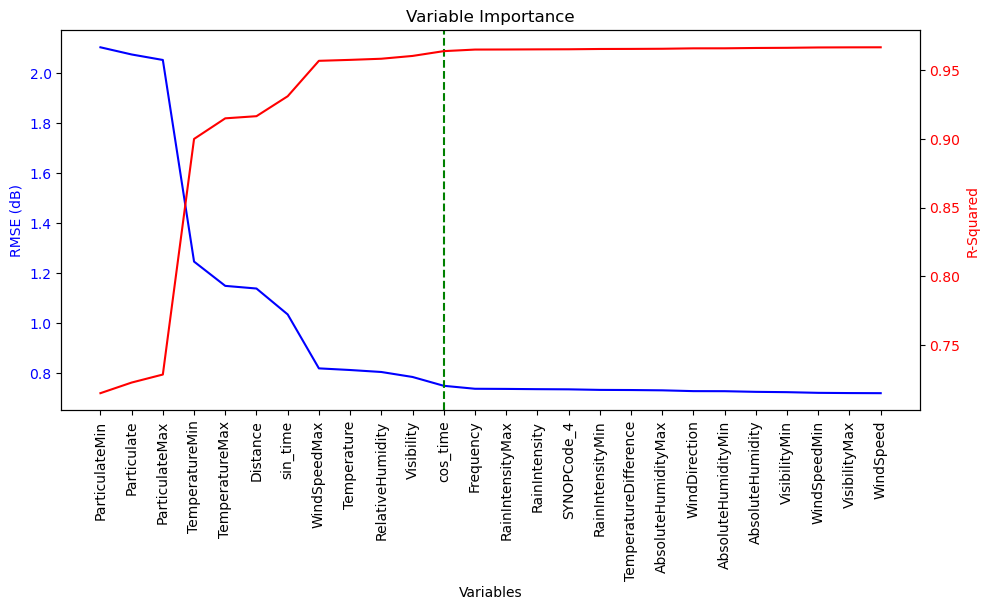

In [32]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 11
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [33]:
selected_features_FSO = [
    'cos_time',
    'Visibility',
    'RelativeHumidity',
    'Temperature',
    'WindSpeedMax' ,
    'sin_time',
    'Distance' ,
    'TemperatureMax' ,
    'TemperatureMin',
    'ParticulateMax' ,
    'Particulate' ,
    'ParticulateMin'
]


In [34]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 0.7121068374302222
Test R^2: 0.9671826557384797


In [ ]:
0.9671826557384797

# Plot

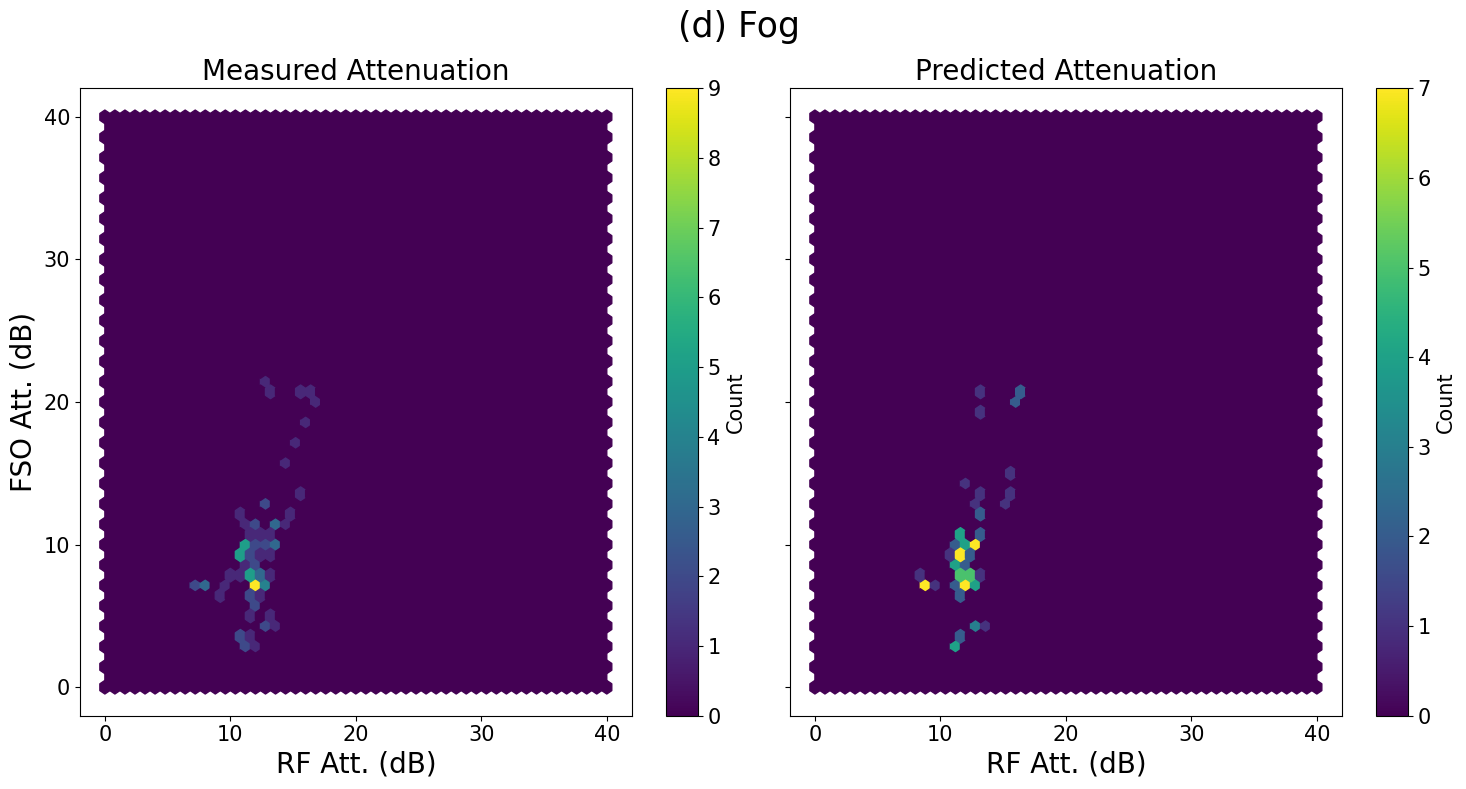

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(d) Fog ',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_28060\1617845358.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_28060\1617845358.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


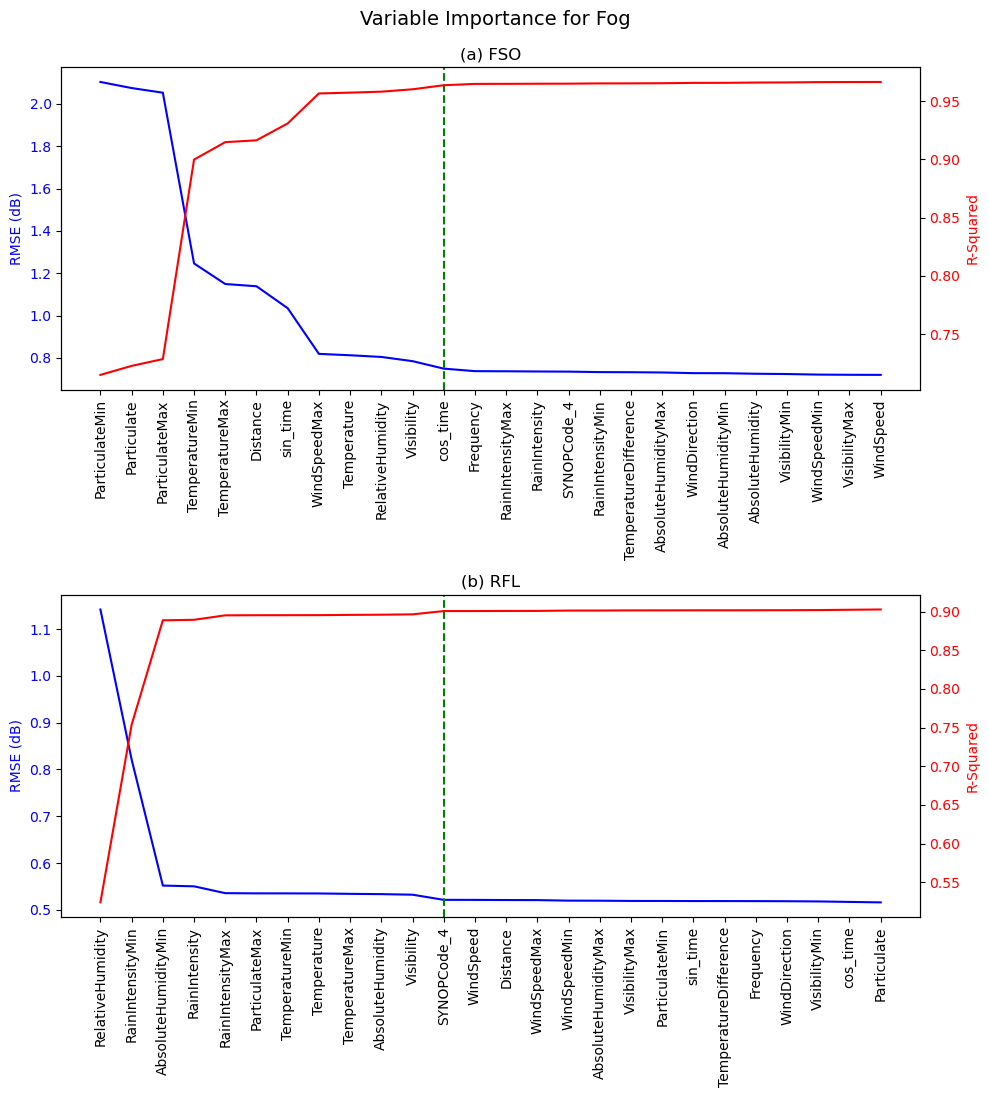

In [54]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 11  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 11  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Fog', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
